In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CADMium import Pssolver
from CADMium import Psgrid
from CADMium import Partition
from CADMium import Inverter

a = 2.0/2
#Nuclear charge for fragments A and B
Za, Zb = 1,1
#Set polarization 1-Unpolarized, 2-Polarized|
pol = 2
#Fragment a electrons [alpha, beta]
Nmo_a = [[1  ,0]] #Number of molecular orbitals to calculate
N_a   = [[0.5,0]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[1  ,0]]
N_b   = [[0.5,0]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[1,1]]
N_m   = [[1,1]]

#Set up grid
NP = 7
NM = [4,4]
L = np.arccosh(10/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, {  "ab_sym"            : True,
                                                                           "ens_spin_sym"      : False,  
                                                                           "kinetic_part_type" : "libxcke",
                                                                           "k_family"          : "gga",
                                                                           "ke_func_id"        : 500,
                                                                           "interaction_type"  : "ni",
                                                                           "fractional"        : True,
                                                                            })

#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m)
part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True,
                                              "ENS_SPIN_SYM"   : False,  
                                              "use_iterative"  : False,
                                              "invert_type"    : "wuyang",
                                              "Tol_lin_solver" : 1e-3,
                                              "disp"           : True,  
                                            })


part.optPartition.isolated = True
part.scf({"disp"     : True,
          "e_tol"    : 1e-7})

----> Begin SCF calculation for *Isolated* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -0.25000     -0.25000       1.000e+00 
    2           -0.25000     -0.25000       4.100e-10 


In [2]:
na0 = part.KSa.n
nb0 = part.KSb.n

part.optPartition.isolated = False
part.scf({'iterative' : False,
          'disp'      : True,
           'continuing' : True})

----> Begin SCF calculation for *Interacting* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -0.20949     -0.20949       1.000e+00 
    2           -0.21997     -0.21997       7.238e-02 
    3           -0.22295     -0.22295       1.886e-02 
    4           -0.22339     -0.22339       2.846e-03 
    5           -0.22347     -0.22347       5.259e-04 
    6           -0.22348     -0.22348       9.523e-05 
    7           -0.22349     -0.22349       1.723e-05 
    8           -0.22349     -0.22349       3.114e-06 
    9           -0.22349     -0.22349       5.623e-07 
   10           -0.22349     -0.22349       1.015e-07 
   11           -0.22349     -0.22349       1.831e-08 


In [3]:
# Look at all of the energy components
vars(part.E)

{'Ea': -0.22348683901190802,
 'Eb': -0.22348683901190802,
 'Ef': -0.44697367802381605,
 'Tsf': 0.6872831483177428,
 'Eksf': array([[-1.10263421,  0.        ]]),
 'Enucf': -1.1342568263415589,
 'Exf': 0.0,
 'Ecf': 0.0,
 'Ehf': 0.0,
 'Vhxcf': 0.0,
 'Ep': -0.6556597136039147,
 'Ep_pot': -0.5704371578257039,
 'Ep_kin': -0.0852225557782108,
 'Ep_hxc': 0,
 'Et': -1.1026333916277307,
 'Vnn': 0.5,
 'E': -0.6026333916277307,
 'evals_a': array([-1.10263421e+00, -4.50359963e+15]),
 'evals_b': array([-1.10263421e+00, -4.50359963e+15]),
 'Ep_h': 0,
 'Ep_x': 0,
 'Ep_c': 0}

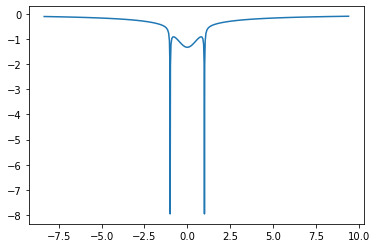

In [5]:
# Plot partition potential in one-dimension. 

full, x,y = grid.plotter(part.V.vp[:,0] + part.V.vp[:,1])
x_axis,vp = grid.axis_plot(part.V.vp[:,0] + part.V.vp[:,1])
plt.plot(x_axis, vp)